# Explore GRS images

## Load python libraries

In [1]:

import glob
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr
import rioxarray  # activate the rio accessor

import hvplot.xarray
import pyproj as ppj

#import cartopy
import cartopy.crs as ccrs
#import cartopy.feature as cfeature
#import locale
#locale.setlocale(locale.LC_ALL, 'en_US.utf8')
import matplotlib.pyplot as plt
import matplotlib as mpl
#mpl.use('TkAgg')

import panel as pn

import grs
import grstbx
from grstbx import visual

u = grstbx.utils
opj = os.path.join


print(f'-grs: {grs.__version__}')
print(f'-grstbx: {grstbx.__version__}')

-grs: 2.1.6
-grstbx: 2.0.2


## Set the images you want to play with

In [11]:
idir='/data/satellite/Sentinel-2/projet/robert/L2A'




figdir = opj('/data/satellite/Sentinel-2/projet/robert/fig_L2A')
os.makedirs(figdir, exist_ok=True)

In [15]:
plt.ioff()
# ------------------
# setting up loop on dates
daterange = pd.date_range(start_date, end_date)


kwarg = ''

# ------------------
# check if L1C exists and set directories / files
year = '2020' #date.strftime('%Y')
month = date.strftime('%m')
day = date.strftime('%d')
subdir = year #opj(tile, year, month, day)
l2a_dir = opj(idir,subdir)

files = glob.glob(opj(l2a_dir,'*','S*[0-9].nc'))
for file in files:
    print(file)
    figfile=os.path.basename(file).replace('.nc','.png')
    figpath = opj(figdir,figfile)
    if os.path.exists(figpath):
        pass
        #continue
    raster = xr.open_dataset(file,decode_coords='all')
    
    
    str_epsg = str(raster.rio.crs)
    zone = str_epsg[-2:]
    is_south = str_epsg[2] == 7
    proj = ccrs.UTM(zone, is_south)
    
    alpha=0.35
    bcmap = mpl.colors.ListedColormap([(0,0,0,0),'khaki'])
    bcmap2 = mpl.colors.ListedColormap([(0,0,0,0),'red'])
    
    plt.figure(figsize=(15,15))
    raster.Rrs.sel(wl=[665,560,490]).where(raster.mask==0).where(raster.Rrs.isel(wl=1)<0.075).plot.imshow(rgb='wl', robust=True,subplot_kws=dict(projection=proj))
    
    # get landmask (third bit)
    bcmap = mpl.colors.ListedColormap([(0,0,0,0),'green'])
    flag_value = 1 << 3
    #((raster.flags & flag_value) != 0).plot.imshow(cmap=bcmap,alpha=alpha,add_colorbar=False)
    # get cloud p06 (second bit)
    bcmap = mpl.colors.ListedColormap([(0,0,0,0),'red'])
    flag_value = int('0010', 2)
    ((raster.flags & flag_value) != 0).plot.imshow(cmap=bcmap,alpha=alpha,add_colorbar=False)
    # get cloud p08 (third bit)
    bcmap = mpl.colors.ListedColormap([(0,0,0,0),'khaki'])
    flag_value = int('0100', 2)
    ((raster.flags & flag_value) != 0).plot.imshow(cmap=bcmap,alpha=alpha,add_colorbar=False)
    plt.savefig(figpath)
    plt.close()
    del raster

/data/satellite/Sentinel-2/projet/robert/L2A/2020/S2B_MSIL2A_20201212T102329_N0500_R065_T30PYT_20230225T092523/S2B_MSIL2A_20201212T102329_N0500_R065_T30PYT_20230225T092523.nc


AttributeError: 'Dataset' object has no attribute 'mask'

In [15]:

figfile=os.path.basename(file).replace('.nc','.png')

In [7]:
raster = xr.open_dataset(file,decode_coords='all')

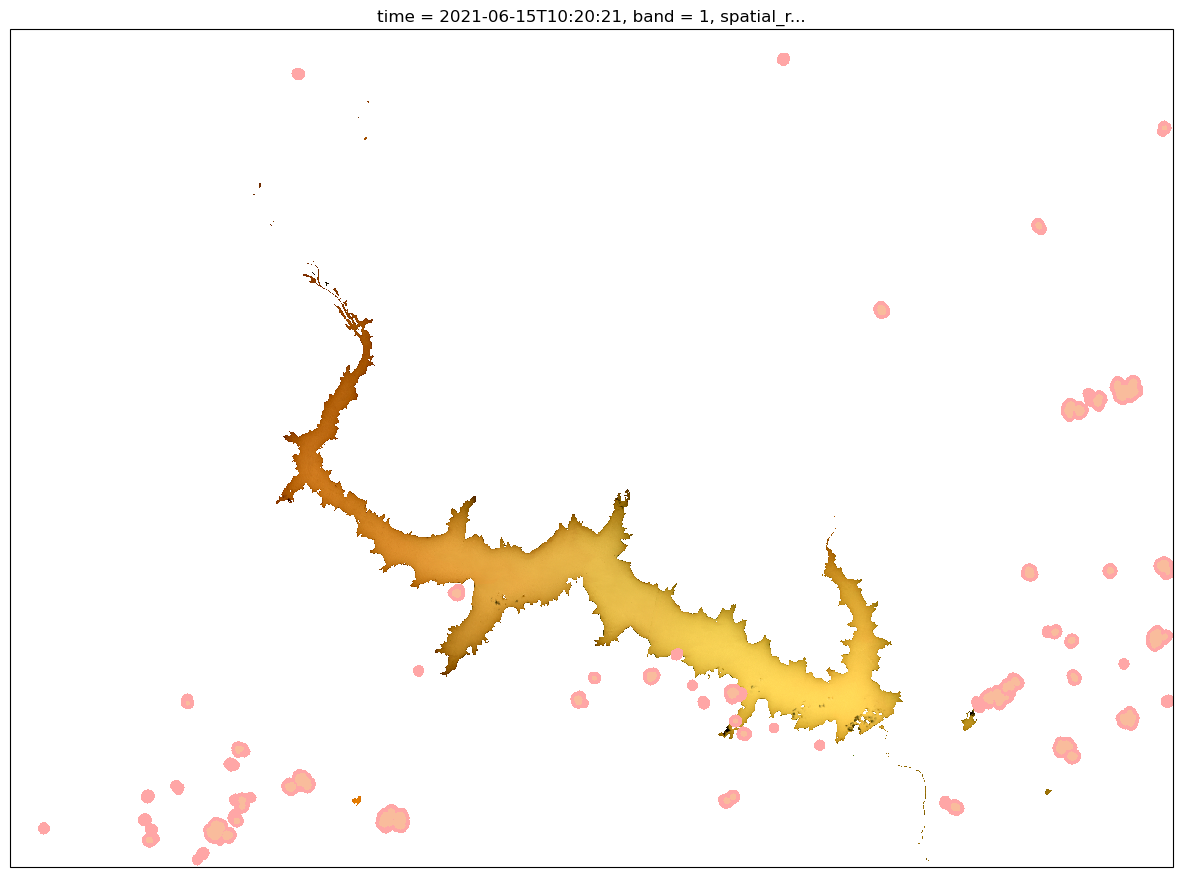

In [10]:

str_epsg = str(raster.rio.crs)
zone = str_epsg[-2:]
is_south = str_epsg[2] == 7
proj = ccrs.UTM(zone, is_south)

alpha=0.35
bcmap = mpl.colors.ListedColormap([(0,0,0,0),'khaki'])
bcmap2 = mpl.colors.ListedColormap([(0,0,0,0),'red'])

plt.figure(figsize=(15,15))
raster.Rrs.sel(wl=[665,560,490]).where(raster.mask==0).where(raster.Rrs.isel(wl=1)<0.05).plot.imshow(rgb='wl', robust=True,subplot_kws=dict(projection=proj))

# get landmask (third bit)
bcmap = mpl.colors.ListedColormap([(0,0,0,0),'green'])
flag_value = 1 << 3
#((raster.flags & flag_value) != 0).plot.imshow(cmap=bcmap,alpha=alpha,add_colorbar=False)
# get cloud p06 (second bit)
bcmap = mpl.colors.ListedColormap([(0,0,0,0),'red'])
flag_value = int('0010', 2)
((raster.flags & flag_value) != 0).plot.imshow(cmap=bcmap,alpha=alpha,add_colorbar=False)
# get cloud p08 (third bit)
bcmap = mpl.colors.ListedColormap([(0,0,0,0),'khaki'])
flag_value = int('0100', 2)
((raster.flags & flag_value) != 0).plot.imshow(cmap=bcmap,alpha=alpha,add_colorbar=False)
#plt.savefig(opj(figdir,figfile))
plt.show()